In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df_fam = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.fam", delim_whitespace=True, header=None)

In [4]:
df_bim = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.bim", delim_whitespace=True, header=None)

In [5]:
df_kin = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.kin", delim_whitespace=True)

In [6]:
df_sexcheck = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.sexcheck", delim_whitespace=True)

In [33]:
df_hwe = pd.read_csv("/proj/regeps/regep00/studies/TopMed/data/dna/whole_genome/TopMed/data/freezes/freeze.10.cdnm/tmp/GECOPD_annotated_plink_merged.hwe", delim_whitespace=True)

### GECOPD_annotated_plink_merged.fam
#### Show population details

In [4]:
print("Population...")
print("# of Rows: " + str(df_fam.shape[0]))
print("# of Columns: " + str(df_fam.shape[1]))

Population...
# of Rows: 10588
# of Columns: 6


In [35]:
# Show null/missing values per column
df_fam.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
dtype: int64

In [36]:
# Ensure that column 1 has no repeated values
assert(df_fam[1].value_counts().sum() == df_fam.shape[0])

### GECOPD_annotated_plink_merged.bim
#### Show counts/total for column 0

In [37]:
print("# of rows in column 0: " + str(df_bim[0].count()))

# of rows in column 0: 55104308


In [38]:
df_bim[0].value_counts()

2     4541038
1     4184003
3     3760895
4     3711383
5     3448161
6     3274129
7     3071887
8     2986204
11    2612348
10    2604176
12    2509373
23    2484349
9     2327673
13    1865224
16    1731360
14    1679950
15    1539699
17    1503400
18    1489892
20    1204631
19    1163993
22     716997
21     693543
Name: 0, dtype: int64

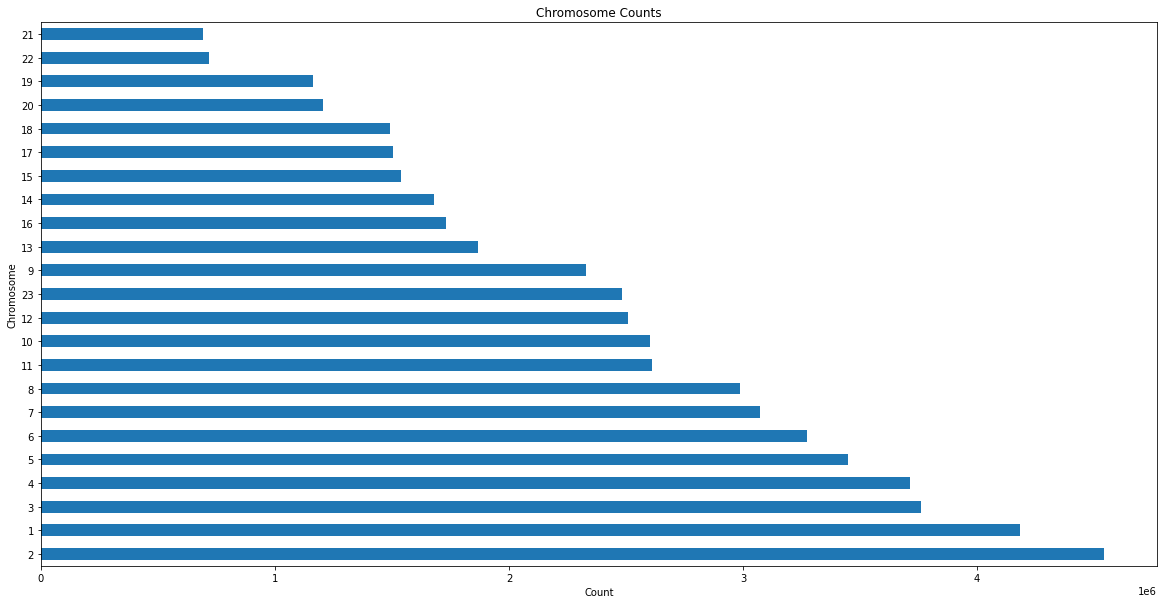

In [39]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

df_bim[0].value_counts().plot(kind= "barh");
plt.title("Chromosome Counts");
plt.ylabel("Chromosome");
plt.xlabel("Count");

### GECOPD_annotated_plink_merged.kin

#### Show Error=1, Error=0.5, Kinship >= 0.354

In [40]:
df_kin_error1 = df_kin[df_kin["Error"] == 1]
df_kin_error05 = df_kin[df_kin["Error"] == 0.5]
df_kin_kinship03 = df_kin[df_kin["Kinship"] >= 0.354]

kin_stats_data = { 
    "Error == 1": [df_kin_error1.shape[0], df_kin.shape[0] - df_kin_error1.shape[0]],
    "Error == 0.5": [df_kin_error05.count()[0], df_kin.shape[0] - df_kin_error05.shape[0]],
    "Kinship >= 0.354": [df_kin_kinship03.count()[0], df_kin.shape[0] - df_kin_kinship03.count()[0]]
}

df_kin_stats = pd.DataFrame(data=kin_stats_data, index=["Row Count", "Rows Lost"])
df_kin_stats

,Error == 1,Error == 0.5,Kinship >= 0.354
Row Count,29346,1816277,164
Rows Lost,56018232,54231301,56047414


### GECOPD_annotated_plink_merged.sexcheck

#### Histogram of F

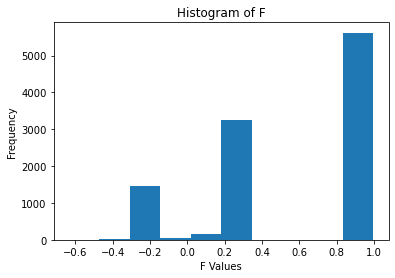

In [41]:
plt.hist(df_sexcheck["F"]);
plt.title("Histogram of F");
plt.ylabel("Frequency");
plt.xlabel("F Values");

#### Table of SNPSEX == 0

In [42]:
df_sexcheck_SNPSEX0 = df_sexcheck[df_sexcheck["SNPSEX"] == 0]

sexcheck_diff = {
    "SNPSEX == 0": [df_sexcheck_SNPSEX0.shape[0], df_sexcheck.shape[0] - df_sexcheck_SNPSEX0.shape[0]]
}

df_sexcheck_diff = pd.DataFrame(data=sexcheck_diff, index=["Row Count", "Rows Lost"])
df_sexcheck_diff

,SNPSEX == 0
Row Count,3026
Rows Lost,7562


#### Count of each SNPSEX value

In [43]:
df_sexcheck["SNPSEX"].value_counts()

1    5623
0    3026
2    1939
Name: SNPSEX, dtype: int64

### GECOPD_annotated_plink_merged.hwe
#### P <= configured threshold (default=1x10^-6)

In [44]:
df_hwe_psmall = df_hwe[df_hwe["P"] <= 10 ** -6]
print("# of Rows for P <= 1x10^-6: " + str(df_hwe_psmall.shape[0]))

# of Rows for P <= 1x10^-6: 4668798


In [45]:
hwe_diff = {
    "P <= 1x10^-6": [df_hwe_psmall.shape[0], df_hwe.shape[0] - df_hwe_psmall.shape[0]]
}

df_hwe_diff = pd.DataFrame(data=hwe_diff, index=["Row Count", "Rows Lost"])
df_hwe_diff

,P <= 1x10^-6
Row Count,4668798
Rows Lost,50435510
